In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
# Set the path to your dataset folders
blad_folder = r"C:\Users\BluRay\Downloads\project\project-1\data0330\bald"
not_blad_folder = r"C:\Users\BluRay\Downloads\project\project-1\data0330\notbald"


In [3]:
blad_images = []
for filename in os.listdir(blad_folder):
    img = tf.keras.preprocessing.image.load_img(os.path.join(blad_folder, filename), target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    blad_images.append(img_array)
blad_images = np.array(blad_images)

not_blad_images = []
for filename in os.listdir(not_blad_folder):
    img = tf.keras.preprocessing.image.load_img(os.path.join(not_blad_folder, filename), target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    not_blad_images.append(img_array)
not_blad_images = np.array(not_blad_images)

D:\Downlouds\anaconda\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
blad_images

array([[[[ 22.,  19.,  14.],
         [ 20.,  16.,  15.],
         [ 14.,  14.,  12.],
         ...,
         [ 29.,  20.,  11.],
         [ 45.,  35.,  25.],
         [ 57.,  44.,  28.]],

        [[ 20.,  17.,  12.],
         [ 19.,  19.,  17.],
         [ 19.,  15.,  14.],
         ...,
         [ 31.,  26.,  20.],
         [ 51.,  43.,  32.],
         [ 49.,  39.,  27.]],

        [[ 21.,  18.,  13.],
         [ 18.,  18.,  16.],
         [ 22.,  18.,  17.],
         ...,
         [ 36.,  27.,  18.],
         [ 77.,  69.,  58.],
         [ 53.,  46.,  30.]],

        ...,

        [[ 17., 118., 174.],
         [163., 217., 245.],
         [107., 166., 210.],
         ...,
         [127., 188., 217.],
         [191., 242., 255.],
         [ 17., 118., 174.]],

        [[ 17., 118., 174.],
         [159., 209., 242.],
         [244., 255., 241.],
         ...,
         [ 18., 116., 177.],
         [ 13., 119., 179.],
         [ 17., 118., 174.]],

        [[ 17., 118., 174.],
       

In [5]:
# Create labels for the images (1 for blad, 0 for not blad)
blad_labels = np.ones(len(blad_images))
not_blad_labels = np.zeros(len(not_blad_images))

In [6]:
# Concatenate blad and not blad images and labels
X = np.concatenate((blad_images, not_blad_images), axis=0)
y = np.concatenate((blad_labels, not_blad_labels), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Data augmentation for training set (optional)
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_data_gen.fit(X_train)


In [8]:
# Task 2: Artificial Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(64, 64, 3)))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(train_data_gen.flow(X_train, y_train), epochs=10)


Epoch 1/10
25/25 [==============================] - 4s 30ms/step - loss: 0.9692 - accuracy: 0.4811
Epoch 2/10
25/25 [==============================] - 1s 30ms/step - loss: 0.6997 - accuracy: 0.5033
Epoch 3/10
25/25 [==============================] - 1s 30ms/step - loss: 0.6906 - accuracy: 0.5241
Epoch 4/10
25/25 [==============================] - 1s 31ms/step - loss: 0.6917 - accuracy: 0.5059
Epoch 5/10
25/25 [==============================] - 1s 31ms/step - loss: 0.6930 - accuracy: 0.5059
Epoch 6/10
25/25 [==============================] - 1s 29ms/step - loss: 0.6931 - accuracy: 0.5046
Epoch 7/10
25/25 [==============================] - 1s 30ms/step - loss: 0.6923 - accuracy: 0.5085
Epoch 8/10
25/25 [==============================] - 1s 30ms/step - loss: 0.6894 - accuracy: 0.4889
Epoch 9/10
25/25 [==============================] - 1s 29ms/step - loss: 0.6841 - accuracy: 0.5397
Epoch 10/10
25/25 [==============================] - 1s 29ms/step - loss: 0.6656 - accuracy: 0.6034


In [9]:
# Task 3: Convolutional Neural Network (CNN)
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_data_gen.flow(X_train, y_train), epochs=10)


Epoch 1/10
25/25 [==============================] - 2s 46ms/step - loss: 0.7751 - accuracy: 0.5215
Epoch 2/10
25/25 [==============================] - 1s 45ms/step - loss: 0.6134 - accuracy: 0.7165
Epoch 3/10
25/25 [==============================] - 1s 46ms/step - loss: 0.5519 - accuracy: 0.7490
Epoch 4/10
25/25 [==============================] - 1s 44ms/step - loss: 0.5323 - accuracy: 0.7334
Epoch 5/10
25/25 [==============================] - 1s 44ms/step - loss: 0.5561 - accuracy: 0.7256
Epoch 6/10
25/25 [==============================] - 1s 50ms/step - loss: 0.5172 - accuracy: 0.7672
Epoch 7/10
25/25 [==============================] - 1s 40ms/step - loss: 0.5049 - accuracy: 0.7594
Epoch 8/10
25/25 [==============================] - 1s 46ms/step - loss: 0.5012 - accuracy: 0.7607
Epoch 9/10
25/25 [==============================] - 1s 38ms/step - loss: 0.4798 - accuracy: 0.7737
Epoch 10/10
25/25 [==============================] - 1s 38ms/step - loss: 0.4806 - accuracy: 0.7750


In [10]:
# Task 4: Performance Evaluation and Comparison
ann_predictions = (ann_model.predict(X_test) > 0.5).astype(int)
ann_accuracy = accuracy_score(y_test, ann_predictions)
ann_precision = precision_score(y_test, ann_predictions)
ann_recall = recall_score(y_test, ann_predictions)
ann_f1score = f1_score(y_test, ann_predictions)

cnn_predictions = (cnn_model.predict(X_test) > 0.5).astype(int)
cnn_accuracy = accuracy_score(y_test, cnn_predictions)
cnn_precision = precision_score(y_test, cnn_predictions)
cnn_recall = recall_score(y_test, cnn_predictions)
cnn_f1score = f1_score(y_test, cnn_predictions)

11/11 [==============================] - 0s 9ms/step


In [11]:
# Compare the results
print("ANN Accuracy:", ann_accuracy)
print("ANN Precision:", ann_precision)
print("ANN Recall:", ann_recall)
print("ANN F1-score:", ann_f1score)
print("CNN Accuracy:", cnn_accuracy)
print("CNN Precision:", cnn_precision)
print("CNN Recall:", cnn_recall)
print("CNN F1-score:", cnn_f1score)

ANN Accuracy: 0.6272727272727273
ANN Precision: 0.6161137440758294
ANN Recall: 0.7558139534883721
ANN F1-score: 0.6788511749347259
CNN Accuracy: 0.6575757575757576
CNN Precision: 0.8554216867469879
CNN Recall: 0.4127906976744186
CNN F1-score: 0.5568627450980391


In [12]:
ann_predictions

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [13]:
cnn_predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [14]:
import matplotlib.pyplot as plt

def display_predictions(images, true_labels, predicted_labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(40, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].astype('uint8'))
        ax.set_title(f"True: {'Bald' if true_labels[i] == 1 else 'Not Bald'}\nPredicted: {'Bald' if predicted_labels[i] == 1 else 'Not Bald'}")
        ax.axis('off')
    plt.show()

ANN Predictions:


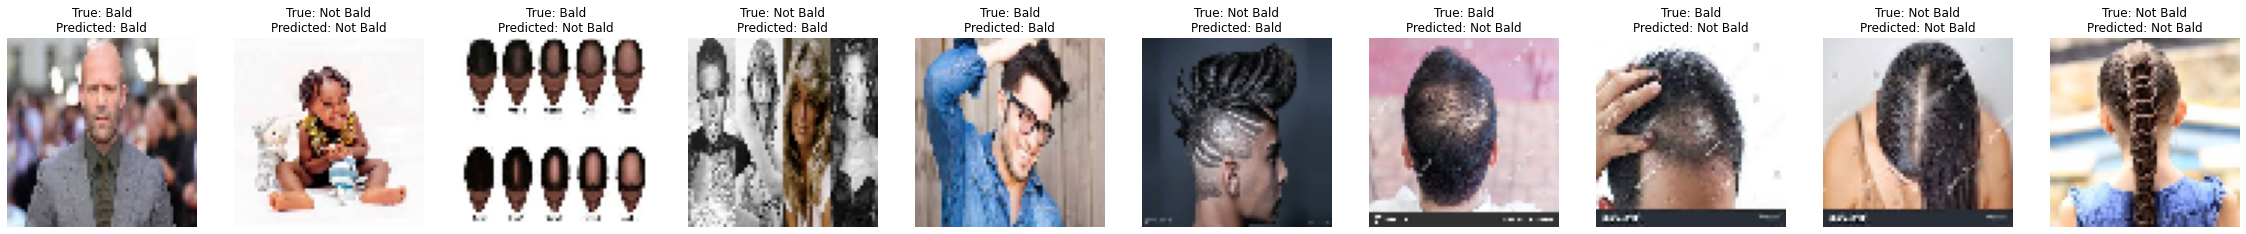

CNN Predictions:


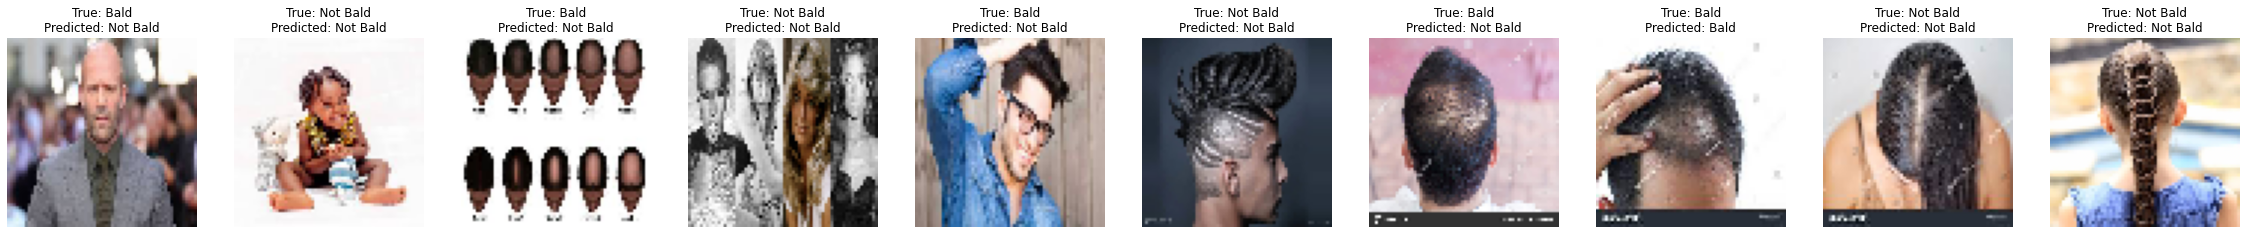

In [15]:
# Display ANN predictions
print("ANN Predictions:")
display_predictions(X_test, y_test, ann_predictions.ravel())

# Display CNN predictions
print("CNN Predictions:")
display_predictions(X_test, y_test, cnn_predictions.ravel())
